In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import MaxPool2D
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input,decode_predictions
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
print(tf.__version__)


2.1.0


# Load the data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)


x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


# Expand the dimensions


In [5]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)


x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


# Number of classes

In [6]:
k = len(set(y_train))
print("number of classes:",k)

number of classes: 10


# Labels

In [28]:
labeles = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankel boot"
]

# Model 5

In [7]:
def get_regularized_model(wd,dropout_rate):
    Model5 = Sequential([
        Conv2D(16,(3,3),kernel_regularizer=regularizers.l2(wd), activation = "relu", input_shape = (28,28,1)),
        MaxPooling2D((3,3)),
        BatchNormalization(momentum=0.95, epsilon=0.005,axis = -1,
                           beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                           gamma_initializer=tf.keras.initializers.Constant(value=0.9)),
        Dropout(dropout_rate),
        Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(wd), activation='relu'),
        MaxPooling2D((2,2)),
        BatchNormalization(momentum=0.95, epsilon=0.005,axis = -1,
                           beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                           gamma_initializer=tf.keras.initializers.Constant(value=0.9)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation = "relu"),
        BatchNormalization(momentum=0.95, epsilon=0.005,axis = -1,
                           beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                           gamma_initializer=tf.keras.initializers.Constant(value=0.9)),
        Dropout(dropout_rate),
        Dense(10, activation = "softmax")
                           ])
    return Model5



In [8]:
Model5 = get_regularized_model(1e-5,0.3)
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
Model5.compile(optimizer = opt,
              loss = "sparse_categorical_crossentropy",
              metrics= [acc,mae])
M5= Model5.fit(x_train,y_train, epochs =25, batch_size = 256)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5758 - sparse_categorical_accuracy: 0.7901 - mean_absolute_error: 4.4200
Epoch 2/25
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4221 - sparse_categorical_accuracy: 0.8443 - mean_absolute_error: 4.4200s - loss: 0.4283 - sparse_categorical_accuracy: 0.8427 -
Epoch 3/25
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3905 - sparse_categorical_accuracy: 0.8577 - mean_absolute_error: 4.4200
Epoch 4/25
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3738 - sparse_categorical_accuracy: 0.8631 - mean_absolute_error: 4.4200
Epoch 5/25
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3616 - sparse_categorical_accuracy: 0.8672 - mean_absolute_error: 4.4200
Epoch 6/25
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3527 - sparse_categorical_accuracy: 0.8718 - mean_ab

In [10]:
Model5.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.2872 - sparse_categorical_accuracy: 0.9020 - mean_absolute_error: 4.4200


[0.2871879375219345, 0.902, 4.419997]

In [11]:
print(pd.DataFrame(M5.history))

        loss  sparse_categorical_accuracy  mean_absolute_error
0   0.575802                     0.790050             4.420000
1   0.422103                     0.844350             4.420001
2   0.390470                     0.857733             4.420001
3   0.373800                     0.863117             4.420002
4   0.361581                     0.867200             4.420001
5   0.352707                     0.871817             4.420000
6   0.351355                     0.873333             4.420000
7   0.342169                     0.876450             4.419999
8   0.338923                     0.878833             4.419999
9   0.337107                     0.877583             4.420000
10  0.333057                     0.881117             4.420000
11  0.333231                     0.881217             4.420000
12  0.330141                     0.882883             4.420000
13  0.328041                     0.884867             4.420000
14  0.325025                     0.884850             4

# CallBacks

In [12]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = [acc]) 
reg_history = regularized_model.fit(x_train,
                                   y_train,
                                   epochs = 25,
                                   validation_split = 0.15,
                                   batch_size = 64,
                                    verbose = 2,
                                   callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)])


Train on 51000 samples, validate on 9000 samples
Epoch 1/25
51000/51000 - 7s - loss: 0.5061 - sparse_categorical_accuracy: 0.8137 - val_loss: 0.3629 - val_sparse_categorical_accuracy: 0.8620
Epoch 2/25
51000/51000 - 7s - loss: 0.3855 - sparse_categorical_accuracy: 0.8579 - val_loss: 0.3117 - val_sparse_categorical_accuracy: 0.8838
Epoch 3/25
51000/51000 - 7s - loss: 0.3540 - sparse_categorical_accuracy: 0.8693 - val_loss: 0.2923 - val_sparse_categorical_accuracy: 0.8897
Epoch 4/25
51000/51000 - 7s - loss: 0.3382 - sparse_categorical_accuracy: 0.8768 - val_loss: 0.3053 - val_sparse_categorical_accuracy: 0.8841
Epoch 5/25
51000/51000 - 7s - loss: 0.3245 - sparse_categorical_accuracy: 0.8801 - val_loss: 0.2826 - val_sparse_categorical_accuracy: 0.8933
Epoch 6/25
51000/51000 - 7s - loss: 0.3145 - sparse_categorical_accuracy: 0.8836 - val_loss: 0.3114 - val_sparse_categorical_accuracy: 0.8803
Epoch 7/25
51000/51000 - 7s - loss: 0.3086 - sparse_categorical_accuracy: 0.8858 - val_loss: 0.2868

# Plot

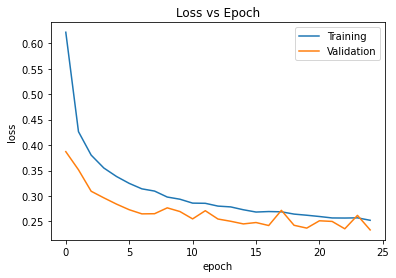

In [10]:
plt.plot(reg_history.history["loss"])
plt.plot(reg_history.history["val_loss"])
plt.title("Loss vs Epoch")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

plt.show()

# Saving the Model

In [14]:
checkpoint_path = "Model_CheckPoints"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,save_weights_only=False,save_freq="epoch", verbose = 1)
                            

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
regularized_model = get_regularized_model(1e-8, 0.2)
regularized_model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = [acc]) 
reg_history = regularized_model.fit(x_train,
                                   y_train,
                                   epochs = 5,
                                   validation_split = 0.15,
                                   batch_size = 64,
                                    verbose = 2,
                                   callbacks = [tf.keras.callbacks.EarlyStopping(patience=10),checkpoint])

Train on 51000 samples, validate on 9000 samples
Epoch 1/5

Epoch 00001: saving model to Model_CheckPoints
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Model_CheckPoints/assets
51000/51000 - 9s - loss: 0.5062 - sparse_categorical_accuracy: 0.8115 - val_loss: 0.4334 - val_sparse_categorical_accuracy: 0.8337
Epoch 2/5

Epoch 00002: saving model to Model_CheckPoints
INFO:tensorflow:Assets written to: Model_CheckPoints/assets
51000/51000 - 8s - loss: 0.3880 - sparse_categorical_accuracy: 0.8549 - val_loss: 0.3304 - val_sparse_categorical_accuracy: 0.8738
Epoch 3/5

Epoch 00003: saving model to Model_CheckPoints
INFO:tensorflow:Assets written to: Model_CheckPoints/assets
51000/51000 - 8s - loss: 0.3584 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3291 - val_sparse_categorical_accuracy: 0.8774
Epoch 4/5

Epoch 00004: saving model to Model_CheckPoints
INFO:tensorflow:Assets written to: Model_CheckPoints/assets
51000

In [18]:
! ls -lh Model_CheckPoints

total 816
drwxr-xr-x@ 2 parzival2108  staff    64B 29 Nov 00:32 assets
-rw-r--r--  1 parzival2108  staff   407K 29 Nov 00:32 saved_model.pb
drwxr-xr-x@ 4 parzival2108  staff   128B 29 Nov 00:32 variables


In [19]:
! ls -lh Model_CheckPoints/variables

total 1056
-rw-r--r--  1 parzival2108  staff   522K 29 Nov 00:32 variables.data-00000-of-00001
-rw-r--r--  1 parzival2108  staff   3.6K 29 Nov 00:32 variables.index


In [20]:
regularized_model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3260 - sparse_categorical_accuracy: 0.8766


[0.32596769139766696, 0.8766]

# Load the model

In [22]:
model = load_model(checkpoint_path)

In [23]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.3260 - sparse_categorical_accuracy: 0.8766


[0.32596778523921965, 0.8766]

# .h5 format to save

In [24]:
model.save("my_model.h5")

In [25]:
! ls -lh my_model.h5

-rw-r--r--  1 parzival2108  staff   210K 29 Nov 00:42 my_model.h5


# Clear Directory

In [26]:
! rm -r Model_CheckPoints

In [27]:
! rm -r my_model.h5

# errors

In [ ]:
regularized_model.evaluate(x_test,y_test)

# solution 
regularized_model.evaluate(x_test[...,np.newaxis],y_test)

# Predict Method

[[7.1644194e-05 9.5949024e-01 1.1723199e-05 3.9846338e-02 4.0097217e-05
  1.2650801e-05 5.1662396e-04 6.3540683e-06 1.6027557e-06 2.7457925e-06]]


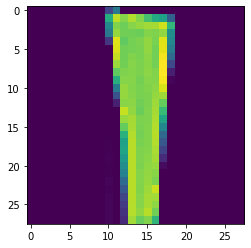

label:Trouser


In [67]:
random_index = np.random.choice(x_test.shape[0])
test_image = x_test[random_index]
print(regularized_model.predict(test_image[np.newaxis,...,]))
plt.imshow(test_image)
plt.show()
print(f"label:{labeles[y_test[random_index]]}")